In [103]:
from sklearn.cluster import DBSCAN
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import plotting

In [28]:
embs = pickle.load(Path('forrest_embs.pkl').open('rb'))
paths = pickle.load(Path('forrest_paths.pkl').open('rb'))
images = pickle.load(Path(
        '/media/neuroscout-data/neuroscout/datasets/raw/studyforrest/stimuli/forrest_cropped_images.pkl').open('rb'))

In [129]:
clust_068 = DBSCAN(eps=0.68, n_jobs=10).fit(embs)

In [223]:
np.unique(clust_068.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134]),
 array([2839, 9460,    6,   13,   96,    5,   11,    6,   34,    6,    5,
           5,   19,   13,   20,    7,   34,    6,    8,    4,    8,    7,
          13,   12,   10,    9,    5,    9,    5,    3,    6,    9,    5,
        

In [251]:
clust80_068 = DBSCAN(eps=0.68, n_jobs=10).fit(embs_80)

In [270]:
clust = DBSCAN(eps=.6, min_samples=10, n_jobs=11).fit(embs_80)

In [272]:
np.unique(clust.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69]),
 array([4702, 1384,   25,   26,  457,   30,   17,   21,   15,   27,   13,
          13,   15,   10,   10,   11,   11,   10,   32,   19,   23,   19,
          16,   10,   10,   41,   20,   11,   15,   10,   20,   20,   39,
          67,   19,   11,   11,   15,   18,   10,   11,   28,   10,   36,
          31,   24,   36,   35,   12,   10,   16,   11,   12,   13,   23,
          12,   19,  157,   16,   12,   12,   21,   13,   38,    6,   10,
          16,   16,   14,   19,   14]))

(<Figure size 720x3240 with 3550 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f700605c7f0>,
         ...,
         ...,
         ...,
        ...,
         ...,
         ...,
         ...,
       dtype=object))

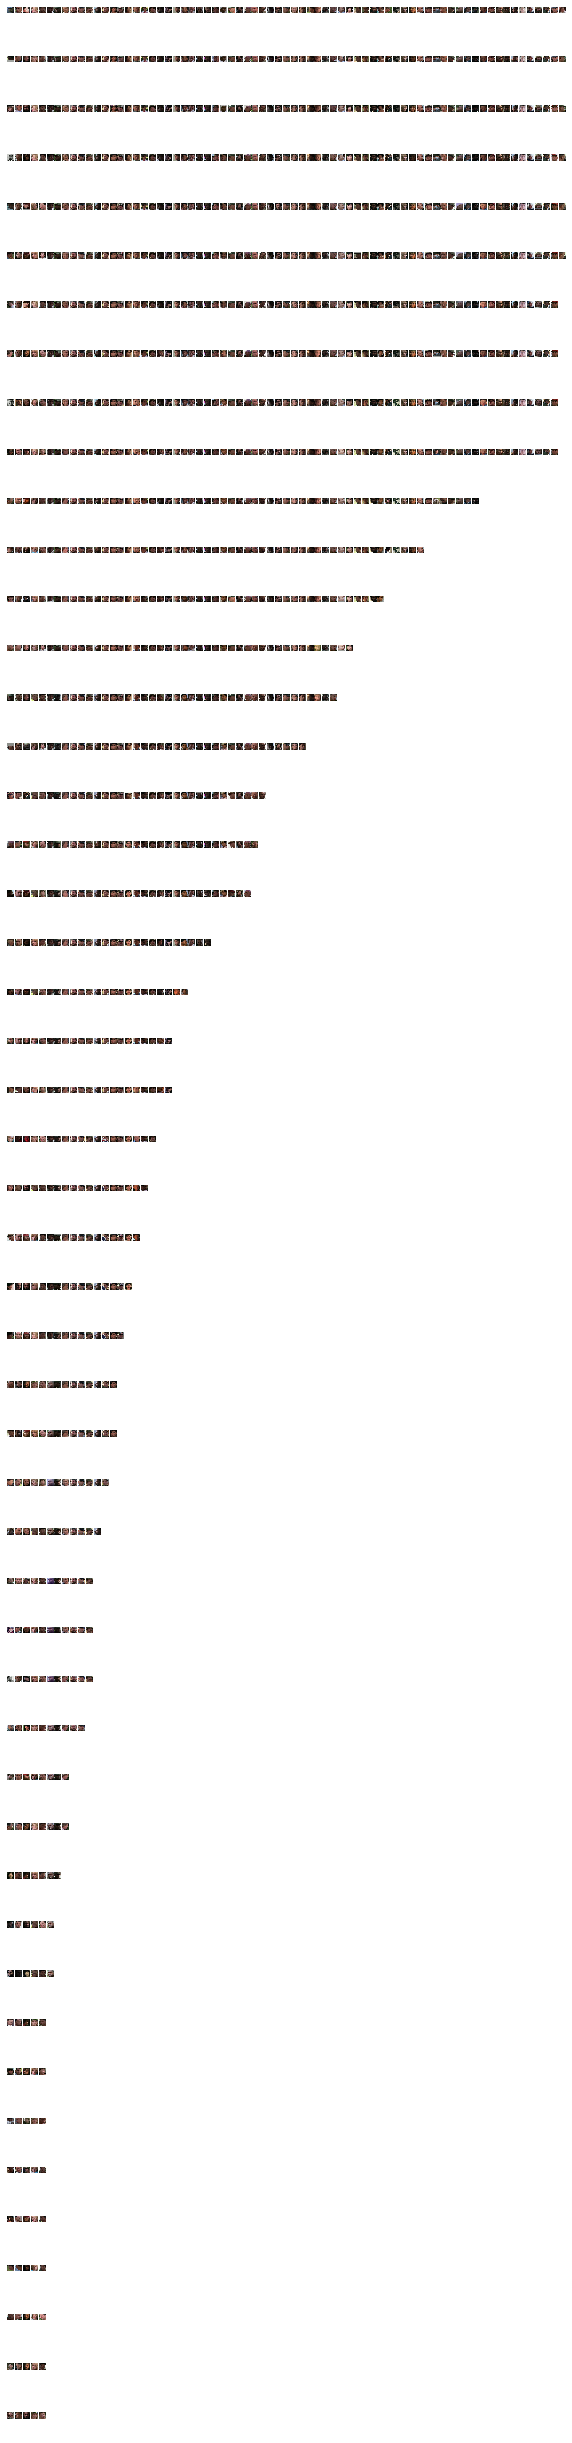

In [271]:
plotting.plot_sklearn_clusters(clust, images_80)

### Try again with only better faces (min 80px)

In [273]:
embs_80 = pickle.load(Path('forrest_embs_80.pkl').open('rb'))
paths_80 = pickle.load(Path('forrest_paths_80.pkl').open('rb'))
images_80 = pickle.load(Path(
        '/media/neuroscout-data/neuroscout/datasets/raw/studyforrest/stimuli/forrest_cropped_images_80.pkl').open('rb'))

In [ ]:
results = {}
for eps in np.arange(0.5, 0.7, 0.05):
    if eps not in results:
        results[eps] = {}
    for min_s in list(range(5, 51, 15)):
        results[eps][min_s] = DBSCAN(eps=eps, min_samples=min_s, n_jobs=11).fit(embs_80)